Model Accuracy: 1.0


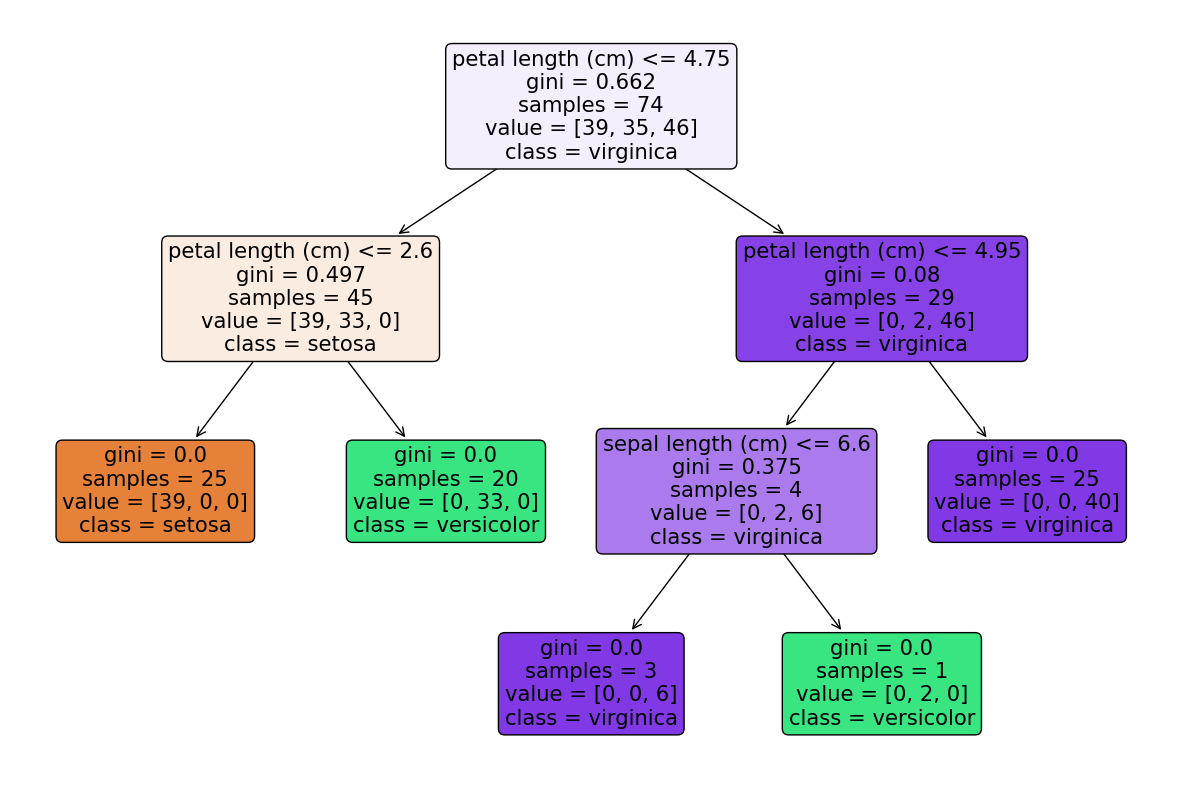

Weight,Feature
0.2467 ± 0.0904,petal width (cm)
0.2267 ± 0.1424,petal length (cm)
0 ± 0.0000,sepal width (cm)
0 ± 0.0000,sepal length (cm)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

#load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt')

#fit on training data
model.fit(X_train, y_train)

#predict for the test set
y_pred = model.predict(X_test)

#calculata accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

#get the first decision tree from the forest to have some idea
first_tree = model.estimators_[0]

#visualize the tree
plt.figure(figsize=(15,10))
plot_tree(first_tree,
          filled=True,
          rounded=True,
          class_names=iris.target_names,
          feature_names=iris.feature_names)
plt.show()

#create a PermutationImportance object on the model and compute importances
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

#feature importance
eli5.show_weights(perm, feature_names = iris.feature_names)